$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\bet}{\beta}
\newcommand{\Ga}{\Gamma} 
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\E}{\op{\mathbb{E}}}
\newcommand{\Var}{\operatorname{Var}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
$

<a href="https://colab.research.google.com/github/joanglaunes/algosto/blob/master/python/TP_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Simulation par inversion de la fonction de répartition

On rappelle que l'algorithme de simulation par inversion de la fonction de répartition consiste à simuler une v.a. $X$ de fonction de répartition $F_X$ dont on sait calculer la pseudo-inverse $F_X^{-1}$ en  
  1. Simulant $U\sim \mathcal{U}([0,1])$.
  2. Puis en posant  $X=F^-(U)$.
  


## Loi exponentielle
Soit $X\sim \mathcal{E} (1)$, sa densité s'écrit $f_X(x) = e^{-x}\mathbf{1}_{x\geq 0}$ et sa fonction de répartition s'écrit $$F_X(x)=1 - e^{-x}.$$ 
Son inverse est $$F_X^-(u)= -\log (1-u).$$ 
On en déduit que si $U$ suit une loi uniforme sur $[0,1]$, $-\log U$ suit une loi $\mathcal{E} (1)$, ce qui nous permet de simuler facilement selon la loi exponentielle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

In [2]:
from TP_simulation import *

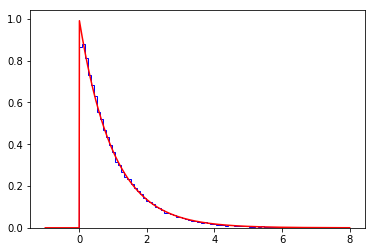

In [3]:
simu_loi_expo(int(1e5))

## Loi de Cauchy
La *loi de Cauchy de paramètre $a$* est la loi de densité 
$$f_a(x) = \frac 1 {\pi}\frac{a}{x^2+a^2}$$ sur $\mathbb{R}$.  

1. Calculer la fonction de répartition $F_a$ de cette loi, ainsi que son inverse $F_a^{-1}$.
2. Simuler un grand nombre de variables aléatoires de loi de Cauchy de paramètre $a$, représenter l'histogramme associé et le comparer à la densité. Que se passe-t-il lorsque $a$ s'approche de $0$ ?

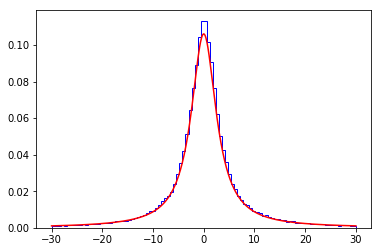

In [4]:
simu_loi_cauchy(int(1e5),3)

# Simulation par la méthode du rejet

On rappelle le principe de la simulation par méthode du rejet. On note $f$ la densité sous laquelle on cherche à simuler. On fait l'hypothèse qu'on connaît une densité $g$ sous laquelle on sait facilement simuler (par exemple une loi uniforme), et telle qu'il existe une constante $c$ telle que $$f(x) \leq c g(x) \;\;\forall x.$$
L'algorithme du rejet poru simuler suivant $f$ consiste alors en les étapes suivantes :
1. Simuler $X$ suivant $g$
2. Simuler $U$ avec une loi uniforme sur $[0,c]$
3. Accepter la valeur de $X$ uniquement si $U\leq \frac{f(X)}{g(X)}$ et sinon recommencer à l'étape 1.

En pratique, pour que cet algorithme soit efficace, on a intérêt à choisir $c$ le plus petit possible tel que $f\leq c g$ soit vérifiée. L'algorithme est d'autant plus efficace que le taux d'acceptation est grand, il perd vite de son intérêt quand la dimension de l'espace augmente.

## Méthode de rejet pour la loi de Wigner
La *loi de Wigner* est la loi de support $[-2, 2]$ et de densité $$\frac 1 {2\pi} \sqrt{4 - x^2}.$$  
1. Simuler un grand nombre de variables aléatoires de loi de Wigner grâce à la méthode du rejet
2. Représenter l'histogramme associé et le comparer à la densité. 

#### Correction 
D'abord, on remarque que la densité est maximale quand $x=0$ et vaut $\frac 1 {\pi}$. Si on choisit 
$$g(x) = \frac 1 4 \mathbf{1}_{[-2,2]}(x),$$ la densité de la loi de Wigner est donc majorée par $\frac{4}{\pi}\times g$, donc on peut appliquer l'algorithme de rejet avec $c = \frac{4}{\pi}$.

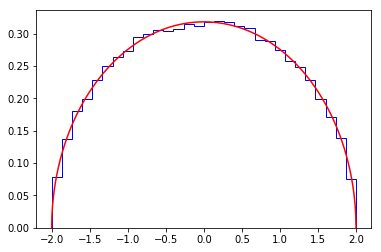

In [5]:
simu_loi_wigner(int(1e5))

## Méthode de rejet pour les lois beta

Le but de cet exercice est d'utiliser la méthode du rejet pour simuler selon la loi Beta de paramètres $\alpha>1$ and $\beta>1$ définie sur l'intervalle $[0, 1]$ par sa densité 
$$
f(x; \alpha, \beta) =\frac{ x^{\alpha-1}(1 - x)^{\beta-1}}{B(\al,\bet)},\qquad\qquad \text{ où } \qquad \;\;B(\al,\bet):=\f{\Ga(\al)\Ga(\bet)}{\Ga(\al+\bet)}
$$
en utilisant une méthode de rejet. Rappelons que l'espérance, le mode est la variance de cette loi sont respectivement :
\begin{eqnarray}
	\E[X] &= &\frac{\alpha}{\alpha + \beta}\\
	\argmax_{x\in[0,1]} \  f(x; \alpha, \beta)& =& \frac{\alpha-1}{\alpha + \beta-2}\\
	\Var(X) &=& \frac{\alpha\beta}{(\alpha +\beta)^2(\alpha+\beta+1)}
\end{eqnarray}

1. Comme la distribution de la loi est définie sur l'intervalle [0,1], on se propose tout d'abord d'utiliser comme loi $g$ la loi uniforme sur cet intervalle. 
     + Prouver que cela est possible et coder l'algorithme de rejet pour la loi Beta. Simuler un grand nombre de variables aléatoires et comparer avec la densité cible.
	 + Donner une condition sur les paramètres de la loi cible Beta pour laquelle la méthode est la plus efficace.
2. Lorsque les paramètres satisfont $$\alpha= \beta,$$ la densité de la loi Beta ressemble à  une cloche. Pour cette raison, on peut dans ce cas utiliser la loi normale comme loi de proposition. 
     + Quelles valeurs de moyenne et variance $\mu$, $\sigma^2$ semblent raisonnables pour cette loi normale ?
     + Pour ces valeurs, comment choisir la constante de domination $c$ de la méthode de rejet en fonction de $\alpha = \beta$ ?


#### Correction avec la loi uniforme
On pose $g$ la densité de la loi uniforme sur [0,1]. Soit 
$$c = f\left(\frac{\alpha-1}{\alpha + \beta-2},\alpha,\beta\right),$$ la densité de la loi Beta est dominée par $c\times g$.

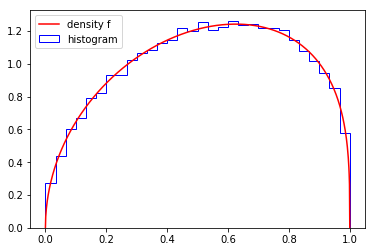

In [6]:
simu_loi_beta(int(1e5),1.5,1.3)

L'algorithme est le plus efficace lorsque la probabilité de rejet est faible, donc lorsque l'aire entre les courbes de $f$ et $c\times g$ est faible. C'est le cas lorsque $\alpha$ et $\beta$ tendent tous les 2 vers $1$.   

#### Correction avec la loi normale lorsque $\alpha = \beta$
On pose $g$ la densité de la loi normale centrée en $\mu = \frac{\alpha}{\alpha + \beta}$ et de variance $\sigma^2 = \frac{\alpha\beta}{(\alpha +\beta)^2(\alpha+\beta+1)}$. Soit 
$$c = f\left(\frac{\alpha-1}{\alpha + \beta-2},\alpha,\beta\right),$$ la densité de la loi Beta est dominée par $c\times g$.

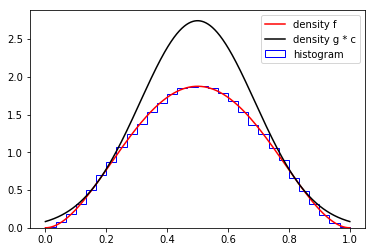

In [7]:
simu_loi_beta2(int(1e5),3)